In [ ]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.7 MB/s eta 0:00:00


## Question 1.1

p = 0.002
  Empirical Mean Degree: 1.82
  Theoretical Mean Degree: 1.80
  Empirical Variance: 1.87
  Theoretical Variance: 1.79


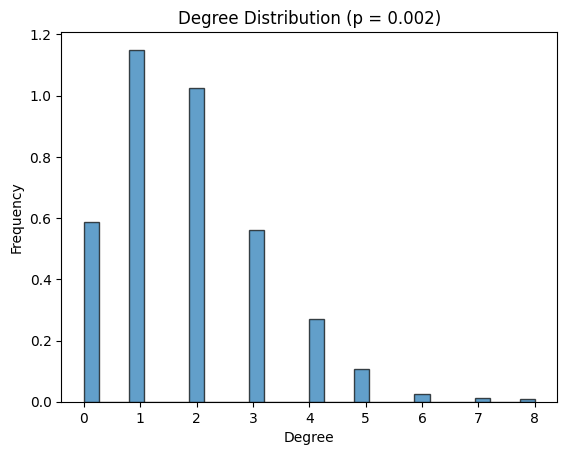

p = 0.006
  Empirical Mean Degree: 5.30
  Theoretical Mean Degree: 5.39
  Empirical Variance: 5.23
  Theoretical Variance: 5.36


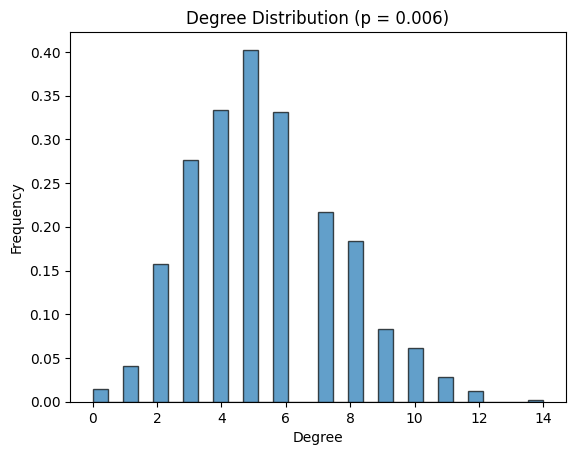

p = 0.012
  Empirical Mean Degree: 10.73
  Theoretical Mean Degree: 10.79
  Empirical Variance: 10.25
  Theoretical Variance: 10.66


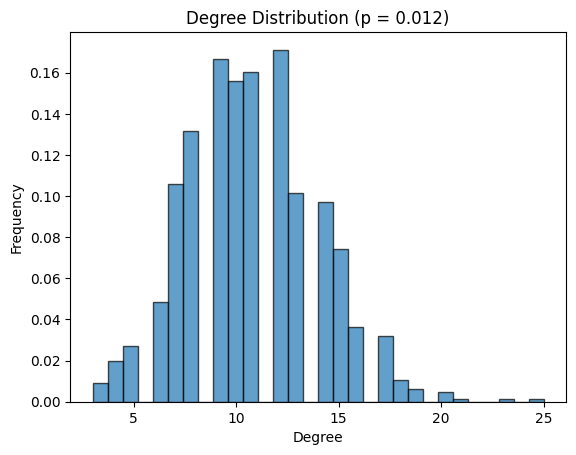

p = 0.045
  Empirical Mean Degree: 40.58
  Theoretical Mean Degree: 40.45
  Empirical Variance: 36.77
  Theoretical Variance: 38.63


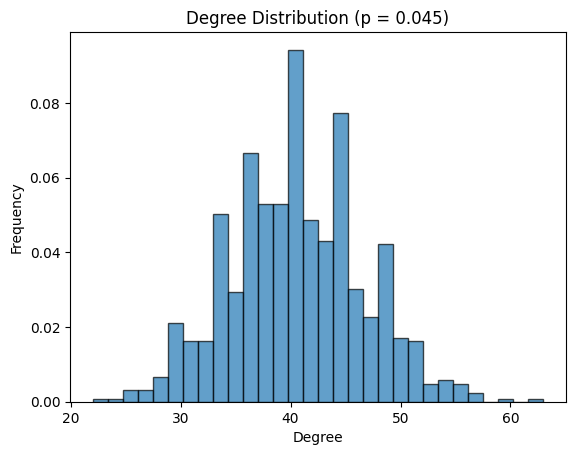

p = 0.1
  Empirical Mean Degree: 90.20
  Theoretical Mean Degree: 89.90
  Empirical Variance: 86.65
  Theoretical Variance: 80.91


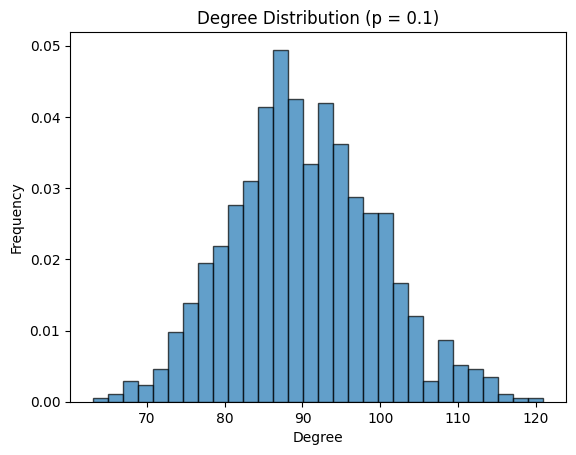

In [ ]:
# 1.1(a)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# 设置节点数和 p 值
n = 900
p_values = [0.002, 0.006, 0.012, 0.045, 0.1]

# 对于每个 p 值生成 ER 网络、计算度分布并绘图
for p in p_values:
    # 使用 igraph 创建无向 ER 网络，不允许自环
    g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)

    # 计算每个节点的度
    degrees = g.degree()

    # 计算经验均值和方差
    emp_mean = np.mean(degrees)
    emp_var = np.var(degrees)

    # 理论上：均值 = (n-1)*p，方差 = (n-1)*p*(1-p)
    theo_mean = (n-1) * p
    theo_var = (n-1) * p * (1 - p)

    # 输出结果
    print(f"p = {p}")
    print(f"  Empirical Mean Degree: {emp_mean:.2f}")
    print(f"  Theoretical Mean Degree: {theo_mean:.2f}")
    print(f"  Empirical Variance: {emp_var:.2f}")
    print(f"  Theoretical Variance: {theo_var:.2f}")

    # 绘制度分布直方图
    plt.figure()
    plt.hist(degrees, bins=30, density=True, edgecolor='black', alpha=0.7)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution (p = {p})")
    plt.show()



In [ ]:
# 1.1(b)
import igraph as ig
import numpy as np

# 设置节点数和 p 值
n = 900
p_values = [0.002, 0.006, 0.012, 0.045, 0.1]
# 设置模拟次数
num_trials = 50

# 对于每个 p 值进行模拟
for p in p_values:
    connected_count = 0        # 记录连通的网络数
    chosen_instance = None       # 用于存储第一个不连通的网络作为示例
    # 进行 num_trials 次模拟
    for i in range(num_trials):
        # 生成 ER 网络
        g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
        # 检查网络是否连通
        if g.is_connected():
            connected_count += 1
        # 如果当前网络不连通且还没有选择示例网络，则保存
        if chosen_instance is None and not g.is_connected():
            chosen_instance = g

    # 计算连通性概率
    connectivity_probability = connected_count / num_trials

    # 输出当前 p 值的连通性概率
    print(f"For p = {p}:")
    print(f"  Connectivity Probability: {connectivity_probability:.2f}")

    # 如果所有模拟网络均连通，则任选一个网络作为示例
    if chosen_instance is None:
        chosen_instance = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
        # 此时直接计算该网络的直径
        diameter_value = chosen_instance.diameter()
        print("  All generated networks are connected.")
    else:
        # 对于不连通的网络，提取其最大连通子图（GCC）
        clusters = chosen_instance.clusters()
        gcc = clusters.giant()
        diameter_value = gcc.diameter()
        print("  At least one generated network is not connected. Using its GCC for diameter.")

    # 输出所选实例（或其 GCC）的直径
    print(f"  Diameter of the (GCC of the) instance: {diameter_value}\n")


For p = 0.002:
  Connectivity Probability: 0.00
  At least one generated network is not connected. Using its GCC for diameter.
  Diameter of the (GCC of the) instance: 27



<ipython-input-3-afe59bcf5e41>:41: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  clusters = chosen_instance.clusters()


For p = 0.006:
  Connectivity Probability: 0.02
  At least one generated network is not connected. Using its GCC for diameter.
  Diameter of the (GCC of the) instance: 8

For p = 0.012:
  Connectivity Probability: 1.00
  All generated networks are connected.
  Diameter of the (GCC of the) instance: 5

For p = 0.045:
  Connectivity Probability: 1.00
  All generated networks are connected.
  Diameter of the (GCC of the) instance: 3

For p = 0.1:
  Connectivity Probability: 1.00
  All generated networks are connected.
  Diameter of the (GCC of the) instance: 3



<ipython-input-4-9ad83894ef4e>:27: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  gcc_size = g.clusters().giant().vcount()


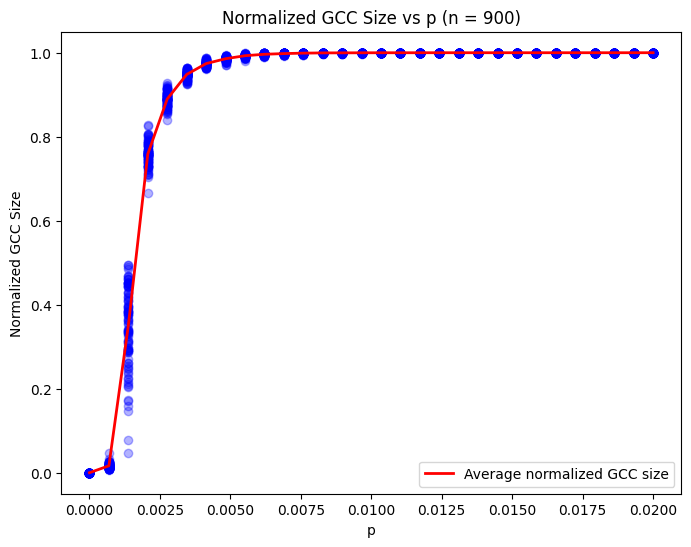

Giant component emerges (avg normalized GCC > 0.1) at p ≈ 0.0014
Giant component covers > 99% of nodes at p ≈ 0.0055


In [ ]:
# 1.1(c)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# 设置网络节点数
n = 900
# 定义 p 值的扫描范围：从 0 到 0.02，取 30 个点
p_values = np.linspace(0, 0.02, 30)
# 每个 p 值下生成网络的模拟次数
num_trials = 100

# 用于存储每个 p 下的归一化 GCC 大小（GCC 大小 / n）的列表
gcc_norm_data = {}

# 对每个 p 值进行模拟
for p in p_values:
    norm_sizes = []  # 存储当前 p 下每个模拟的归一化 GCC 大小
    for _ in range(num_trials):
        # 生成 ER 网络（无向、无自环）
        g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
        # 如果网络是连通的，则 GCC 就是整个网络
        if g.is_connected():
            gcc_size = n
        else:
            # 否则，提取最大连通子图（GCC）
            gcc_size = g.clusters().giant().vcount()
        norm_sizes.append(gcc_size / n)
    gcc_norm_data[p] = norm_sizes

# 绘制散点图和平均值曲线
plt.figure(figsize=(8,6))
# 绘制每个 p 下所有模拟结果的散点
for p in p_values:
    plt.scatter([p]*num_trials, gcc_norm_data[p], color='blue', alpha=0.3)
# 计算每个 p 值下归一化 GCC 大小的平均值
avg_norm_sizes = [np.mean(gcc_norm_data[p]) for p in p_values]
# 绘制平均值曲线（红色）
plt.plot(p_values, avg_norm_sizes, color='red', linewidth=2, label="Average normalized GCC size")
plt.xlabel("p")
plt.ylabel("Normalized GCC Size")
plt.title("Normalized GCC Size vs p (n = 900)")
plt.legend()
plt.show()

# 下面根据平均归一化 GCC 大小估计两个阈值：
# (i) 定义“巨型连通分量开始出现”为：平均归一化 GCC 大小首次超过 0.1
# (ii) 定义“网络几乎全连通”为：平均归一化 GCC 大小达到 0.99

p_emergence = None  # 巨型连通分量开始出现的 p 值
p_full = None       # 网络几乎全连通的 p 值

for p, avg in zip(p_values, avg_norm_sizes):
    if p_emergence is None and avg > 0.1:
        p_emergence = p
    if p_full is None and avg >= 0.99:
        p_full = p
        break

# 输出估计的阈值
if p_emergence is not None:
    print(f"Giant component emerges (avg normalized GCC > 0.1) at p ≈ {p_emergence:.4f}")
else:
    print("Giant component emergence not observed within the p range.")

if p_full is not None:
    print(f"Giant component covers > 99% of nodes at p ≈ {p_full:.4f}")
else:
    print("Giant component does not cover > 99% of nodes within the p range.")


<ipython-input-5-48de2d8917d8>:18: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  gcc_size = g.clusters().giant().vcount()


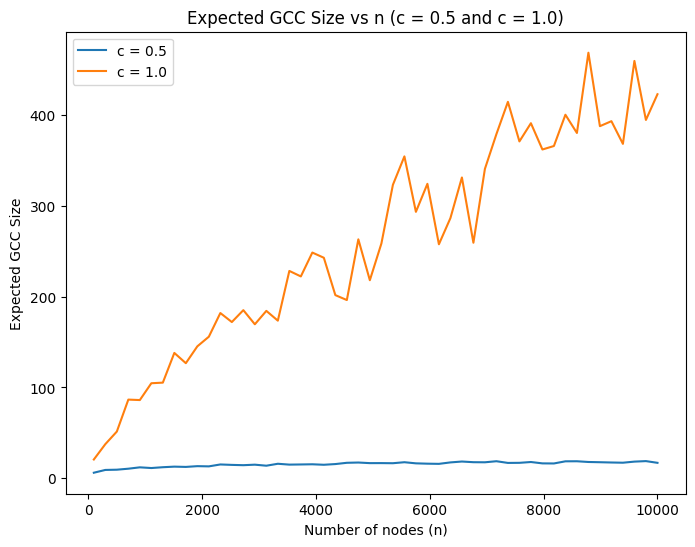

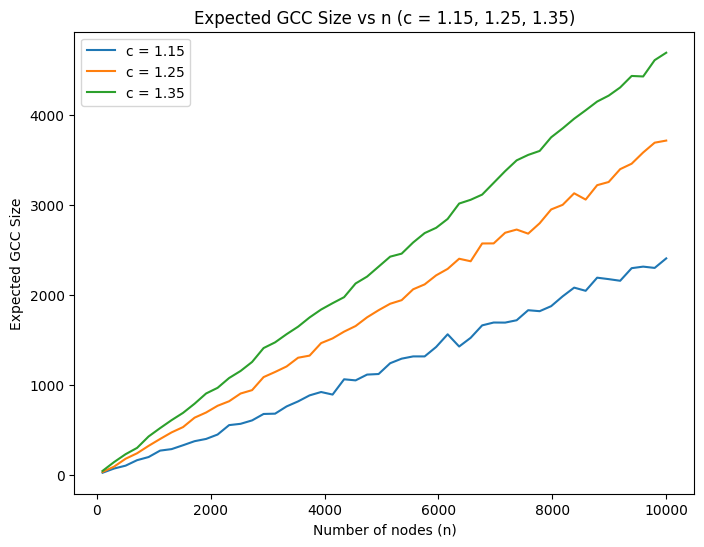

In [ ]:
# 1.1(d)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# 定义函数：给定节点数 n 和平均度 c，计算多次模拟下 GCC 的平均大小
def compute_avg_gcc(n, c, num_trials=30):
    p = c / n  # 根据 c = n * p 得到 p
    gcc_sizes = []
    for _ in range(num_trials):
        # 生成 ER 网络，注意不允许自环
        g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
        # 如果网络是连通的，则 GCC 就是整个网络
        if g.is_connected():
            gcc_size = n
        else:
            # 否则提取最大连通子图（GCC）的节点数
            gcc_size = g.clusters().giant().vcount()
        gcc_sizes.append(gcc_size)
    return np.mean(gcc_sizes)

# 定义 n 的取值范围，从 100 到 10000，取 50 个点
n_values = np.linspace(100, 10000, 50, dtype=int)

# (i) 对于 c = 0.5
c_val = 0.5
gcc_sizes_c05 = [compute_avg_gcc(n, c_val) for n in n_values]

# (ii) 对于 c = 1.0
c_val = 1.0
gcc_sizes_c1 = [compute_avg_gcc(n, c_val) for n in n_values]

# 绘制 c = 0.5 和 c = 1.0 的结果
plt.figure(figsize=(8,6))
plt.plot(n_values, gcc_sizes_c05, label="c = 0.5")
plt.plot(n_values, gcc_sizes_c1, label="c = 1.0")
plt.xlabel("Number of nodes (n)")
plt.ylabel("Expected GCC Size")
plt.title("Expected GCC Size vs n (c = 0.5 and c = 1.0)")
plt.legend()
plt.show()

# (iii) 对于 c = 1.15, 1.25, 1.35，将它们的结果绘制在同一图中
c_values = [1.15, 1.25, 1.35]
gcc_sizes_multi = {}
for c in c_values:
    gcc_sizes_multi[c] = [compute_avg_gcc(n, c) for n in n_values]

plt.figure(figsize=(8,6))
for c in c_values:
    plt.plot(n_values, gcc_sizes_multi[c], label=f"c = {c}")
plt.xlabel("Number of nodes (n)")
plt.ylabel("Expected GCC Size")
plt.title("Expected GCC Size vs n (c = 1.15, 1.25, 1.35)")
plt.legend()
plt.show()



## Question 1.2

Is the preferential attachment network always connected?
Result: True


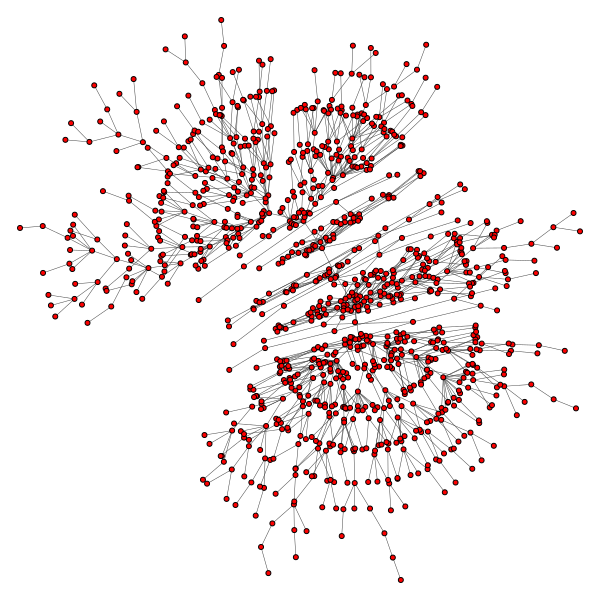

In [ ]:
import igraph as ig
from IPython.display import Image, display

# 设置节点数和每个新节点附加的边数
n = 1050
m = 1

# 生成无向的网络（preferential attachment model）
g = ig.Graph.Barabasi(n=n, m=m, directed=False)

# 检查网络是否连通
is_conn = g.is_connected()
print("Is the preferential attachment network always connected?")
print("Result:", is_conn)

# 使用 Kamada-Kawai 布局绘图（该布局通常能产生较好的视觉效果）
layout = g.layout("kk")

# 定义图的视觉风格参数
visual_style = {
    "vertex_size": 5,      # 节点大小设置为 5
    "vertex_label": None,  # 不显示节点标签
    "edge_width": 0.5,     # 边宽设置为 0.5
    "layout": layout,      # 使用 Kamada-Kawai 布局
    "bbox": (600, 600),    # 图像尺寸
    "margin": 20           # 图像边距
}

# 保存图像到文件，并显示
plot_file = "ba_network.png"
ig.plot(g, plot_file, **visual_style)
display(Image(filename=plot_file))


In [ ]:
# 1.2(b)
import igraph as ig

# 生成 Preferential Attachment 网络（n = 1050, m = 1）
n = 1050
m = 1
g = ig.Graph.Barabasi(n=n, m=m, directed=False)

# 使用 fast greedy 方法进行社区检测
# 注意：该方法返回一个 dendrogram（层次聚类树），我们需要将其转换为社区划分结果。
dendrogram = g.community_fastgreedy()
communities = dendrogram.as_clustering()  # 选择最佳划分（使 modularity 最大）
mod = communities.modularity  # 计算社区划分的 modularity

# 计算网络的 degree assortativity
# Assortativity 表示网络中节点连接倾向于和具有相似属性（这里为度数）的节点相连。
# 对于 degree assortativity，其值为连接边两端节点度数的相关系数：
#   - 正值表示高节点倾向于与高节点相连，低节点倾向于与低节点相连。
#   - 负值表示高节点倾向于与低节点相连。
assort = g.assortativity_degree(directed=False)

# 输出结果
print("Modularity:", mod)
print("Degree Assortativity:", assort)


Modularity: 0.9342875915234532
Degree Assortativity: -0.020906969576115774


In [ ]:
# 1.2(c)
import igraph as ig

# -------------------------
# 生成小规模网络（n = 1050, m = 1）
n_small = 1050
m = 1
g_small = ig.Graph.Barabasi(n=n_small, m=m, directed=False)

# 使用 fast greedy 方法进行社区检测
dendrogram_small = g_small.community_fastgreedy()
communities_small = dendrogram_small.as_clustering()  # 获取最佳划分
mod_small = communities_small.modularity        # 小规模网络的 modularity
assort_small = g_small.assortativity_degree(directed=False)  # 小规模网络的 degree assortativity

print("Small network (n=1050):")
print("  Modularity:", mod_small)
print("  Degree Assortativity:", assort_small)

# -------------------------
# 生成大规模网络（n = 10500, m = 1）
n_large = 10500
g_large = ig.Graph.Barabasi(n=n_large, m=m, directed=False)

# 使用 fast greedy 方法进行社区检测
dendrogram_large = g_large.community_fastgreedy()
communities_large = dendrogram_large.as_clustering()
mod_large = communities_large.modularity        # 大规模网络的 modularity
assort_large = g_large.assortativity_degree(directed=False)  # 大规模网络的 degree assortativity

print("\nLarge network (n=10500):")
print("  Modularity:", mod_large)
print("  Degree Assortativity:", assort_large)


Small network (n=1050):
  Modularity: 0.9347047121912831
  Degree Assortativity: -0.12238152545366027

Large network (n=10500):
  Modularity: 0.9788408451601588
  Degree Assortativity: -0.03340427987214383


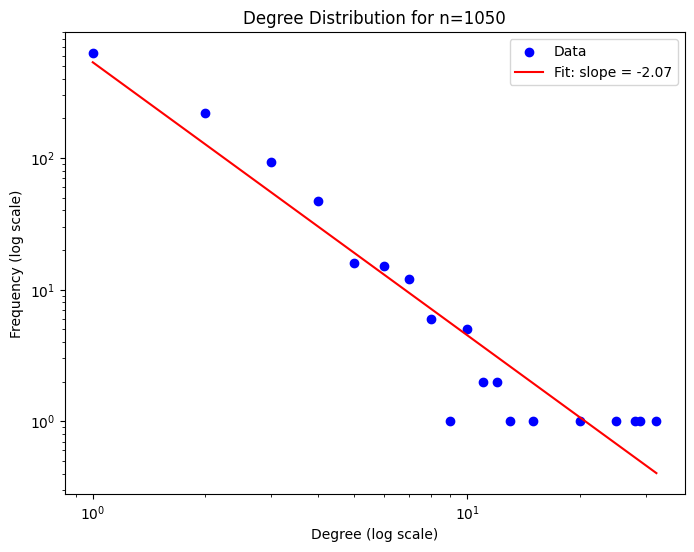

Degree Distribution for n=1050
Estimated slope: -2.07


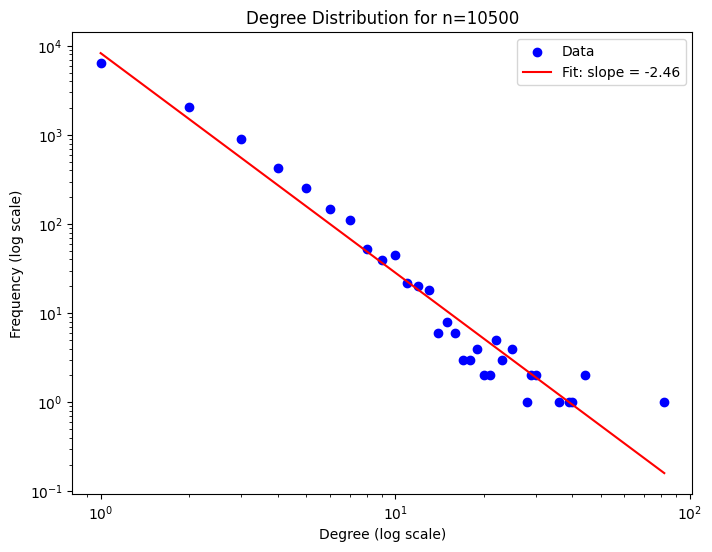

Degree Distribution for n=10500
Estimated slope: -2.46
For n=1050, estimated slope: -2.0736887773938473
For n=10500, estimated slope: -2.462386076298258


In [ ]:
# 1.2(d)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def plot_degree_distribution_loglog(g, title=""):
    # 获取网络中所有节点的度
    degrees = np.array(g.degree())
    # 计算唯一度值及其对应的频次
    k_vals, counts = np.unique(degrees, return_counts=True)

    # 对数据取对数
    log_k = np.log10(k_vals)
    log_counts = np.log10(counts)

    # 使用线性回归拟合 log-log 数据，返回斜率和截距
    slope, intercept = np.polyfit(log_k, log_counts, 1)

    # 绘制散点图，采用对数坐标
    plt.figure(figsize=(8,6))
    plt.scatter(k_vals, counts, color='blue', label="Data")

    # 绘制拟合直线：根据拟合公式 log10(y) = slope*log10(x) + intercept
    fitted_counts = 10**(intercept) * k_vals**(slope)
    plt.plot(k_vals, fitted_counts, color='red', label=f"Fit: slope = {slope:.2f}")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.title(title)
    plt.legend()
    plt.show()

    # 输出拟合结果
    print(title)
    print(f"Estimated slope: {slope:.2f}")
    return slope

# 生成 n = 1050, m = 1
n_small = 1050
m = 1
g_small = ig.Graph.Barabasi(n=n_small, m=m, directed=False)
slope_small = plot_degree_distribution_loglog(g_small, title="Degree Distribution for n=1050")

# 生成 n = 10500, m = 1
n_large = 10500
g_large = ig.Graph.Barabasi(n=n_large, m=m, directed=False)
slope_large = plot_degree_distribution_loglog(g_large, title="Degree Distribution for n=10500")

# 输出两个网络的拟合斜率
print("For n=1050, estimated slope:", slope_small)
print("For n=10500, estimated slope:", slope_large)


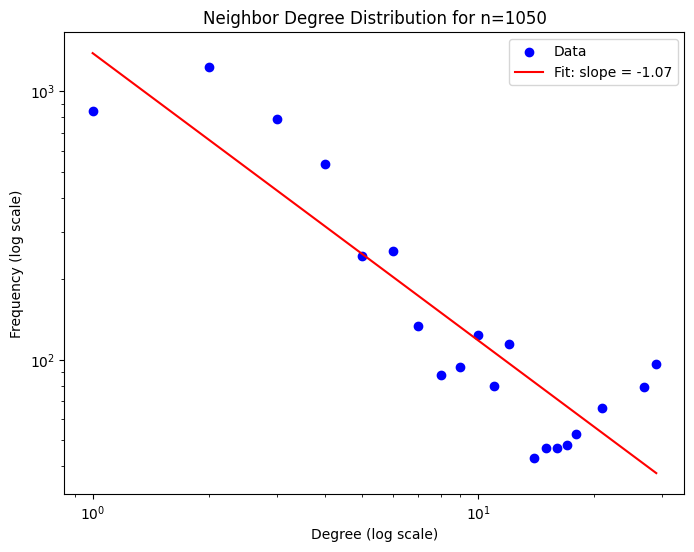

Neighbor Degree Distribution for n=1050
Estimated slope: -1.0699203630380885


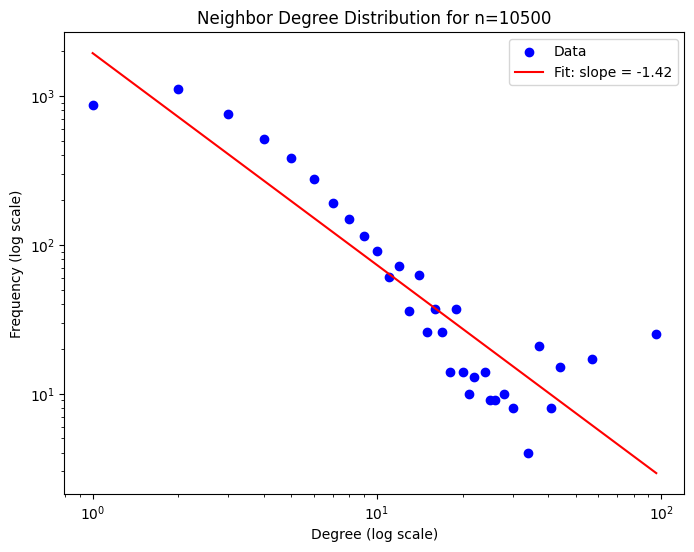

Neighbor Degree Distribution for n=10500
Estimated slope: -1.4239302020703322

Summary:
For n=1050, estimated neighbor degree distribution slope: -1.0699203630380885
For n=10500, estimated neighbor degree distribution slope: -1.4239302020703322


In [ ]:
# 1.2(e)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# 定义函数：随机采样邻居节点的度数
def sample_neighbor_degrees(g, sample_size=5000):
    """
    对于图 g，随机选取 sample_size 次：
    1. 随机选择一个节点 i
    2. 随机选择 i 的一个邻居 j
    3. 记录 j 的度数
    返回所有采样得到的邻居度数数组
    """
    neighbor_degrees = []
    n = g.vcount()
    for _ in range(sample_size):
        # 随机选择一个节点 i
        i = np.random.randint(0, n)
        # 获取 i 的所有邻居
        neighbors = g.neighbors(i)
        # 若 i 无邻居（理论上 BA 模型中不会出现），则跳过该次采样
        if len(neighbors) == 0:
            continue
        # 随机选择一个邻居 j
        j = np.random.choice(neighbors)
        # 记录 j 的度数
        neighbor_degrees.append(g.degree(j))
    return np.array(neighbor_degrees)

# 定义函数：绘制采样得到的邻居度数分布（log-log 坐标），并拟合斜率
def plot_sampled_neighbor_distribution(g, sample_size=5000, title=""):
    """
    计算并绘制图 g 中采样得到的邻居节点度数分布（对数-对数坐标）。
    同时使用线性回归拟合 log-log 数据，返回拟合直线的斜率。
    """
    # 采样得到邻居节点度数
    neighbor_degrees = sample_neighbor_degrees(g, sample_size)
    # 统计每个唯一度数的出现次数
    k_vals, counts = np.unique(neighbor_degrees, return_counts=True)

    # 对数据取对数
    log_k = np.log10(k_vals)
    log_counts = np.log10(counts)

    # 使用线性回归拟合 log-log 数据，返回斜率和截距
    slope, intercept = np.polyfit(log_k, log_counts, 1)

    # 绘制散点图和拟合直线
    plt.figure(figsize=(8,6))
    plt.scatter(k_vals, counts, color='blue', label="Data")
    fitted_counts = 10**intercept * k_vals**(slope)
    plt.plot(k_vals, fitted_counts, color='red', label=f"Fit: slope = {slope:.2f}")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.title(title)
    plt.legend()
    plt.show()

    print(title)
    print("Estimated slope:", slope)
    return slope

# ------------------------------
# 生成两个网络
# 网络 1: n = 1050, m = 1（来自 2(a)）
n_small = 1050
m = 1
g_small = ig.Graph.Barabasi(n=n_small, m=m, directed=False)

# 网络 2: n = 10500, m = 1（来自 2(c)）
n_large = 10500
g_large = ig.Graph.Barabasi(n=n_large, m=m, directed=False)

# ------------------------------
# 对每个网络进行采样，并绘制邻居节点度数分布的 log-log 图
sample_size = 5000  # 可根据需要调整采样次数

slope_small = plot_sampled_neighbor_distribution(g_small, sample_size,
           title="Neighbor Degree Distribution for n=1050")
slope_large = plot_sampled_neighbor_distribution(g_large, sample_size,
           title="Neighbor Degree Distribution for n=10500")

# ------------------------------
print("\nSummary:")
print("For n=1050, estimated neighbor degree distribution slope:", slope_small)
print("For n=10500, estimated neighbor degree distribution slope:", slope_large)


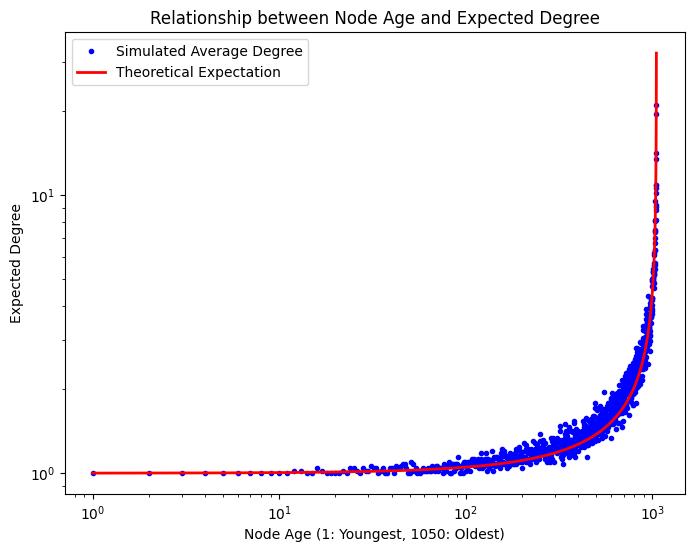

Plot generated showing the relationship between node age and expected degree.


In [ ]:
# 1.2(f)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
n = 1050          # 总节点数
m = 1             # 每个新节点附加边数
num_simulations = 50  # 模拟次数

# 用于累计每个节点的度数，节点顺序即为添加顺序（第一个节点最老，最后一个节点最年轻）
degree_sum = np.zeros(n)

# 多次模拟 BA 网络，并累计各个节点的度数
for sim in range(num_simulations):
    g = ig.Graph.Barabasi(n=n, m=m, directed=False)
    degrees = np.array(g.degree())
    degree_sum += degrees

# 计算每个节点的平均度数
avg_degrees = degree_sum / num_simulations

# 原来的 i_vals 表示节点的添加顺序，其中 i=1 表示最老节点，i=n 表示最新节点
i_vals = np.arange(1, n+1)

# 修改为：定义节点年龄 age = n - i + 1，使得
# 最老的节点 (i=1) 对应 age = n，最新的节点 (i=n) 对应 age = 1
age_vals = n - i_vals + 1

# 根据模型理论，节点 i 的期望度数为 k(i) ≈ sqrt(n / i)
# 将 i 转换为 age： i = n - age + 1
theoretical_degrees = np.sqrt(n / (n - age_vals + 1))

# 为使横轴从最年轻到最老，按年龄从小到大排序
sorted_indices = np.argsort(age_vals)  # 从小到大排序，年龄=1 最年轻
sorted_age = age_vals[sorted_indices]
sorted_avg_degrees = avg_degrees[sorted_indices]
sorted_theoretical = theoretical_degrees[sorted_indices]

# 绘图：比较模拟得到的平均度数与理论预期
plt.figure(figsize=(8,6))
plt.plot(sorted_age, sorted_avg_degrees, 'bo', markersize=3, label="Simulated Average Degree")
plt.plot(sorted_age, sorted_theoretical, 'r-', linewidth=2, label="Theoretical Expectation")
plt.xlabel("Node Age (1: Youngest, {}: Oldest)".format(n))
plt.ylabel("Expected Degree")
plt.title("Relationship between Node Age and Expected Degree")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

print("Plot generated showing the relationship between node age and expected degree.")



############################
m = 1
Generating network with n = 1050 (small network)
Is the network connected? True
Small network (n=1050): Modularity = 0.9303, Assortativity = -0.0765
Large network (n=10500): Modularity = 0.9789, Assortativity = -0.0511


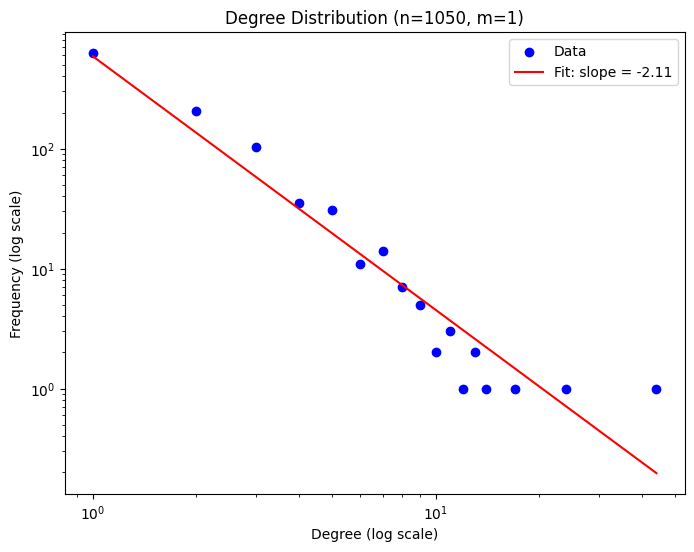

Degree Distribution (n=1050, m=1)
Estimated slope: -2.1145568494344174


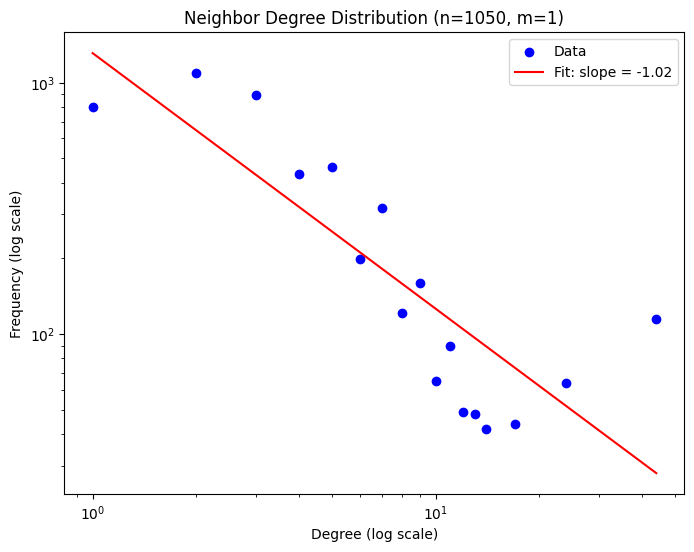

Neighbor Degree Distribution (n=1050, m=1)
Estimated slope: -1.0167076516258964


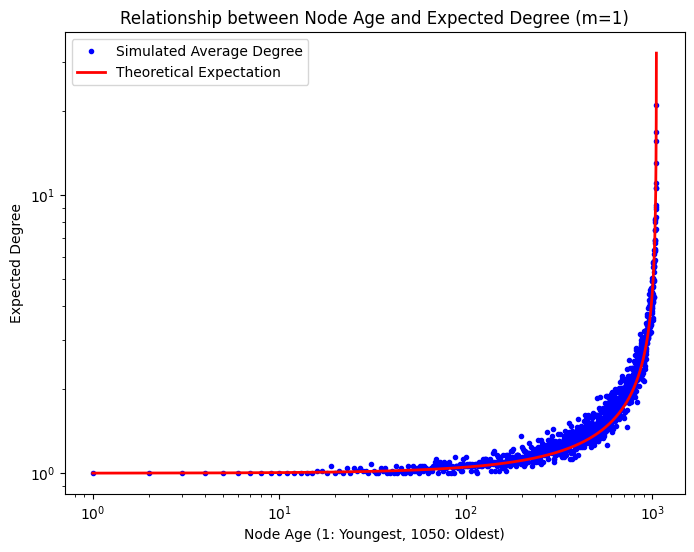


############################
m = 2
Generating network with n = 1050 (small network)
Is the network connected? True
Small network (n=1050): Modularity = 0.5133, Assortativity = -0.0631
Large network (n=10500): Modularity = 0.5314, Assortativity = -0.0144


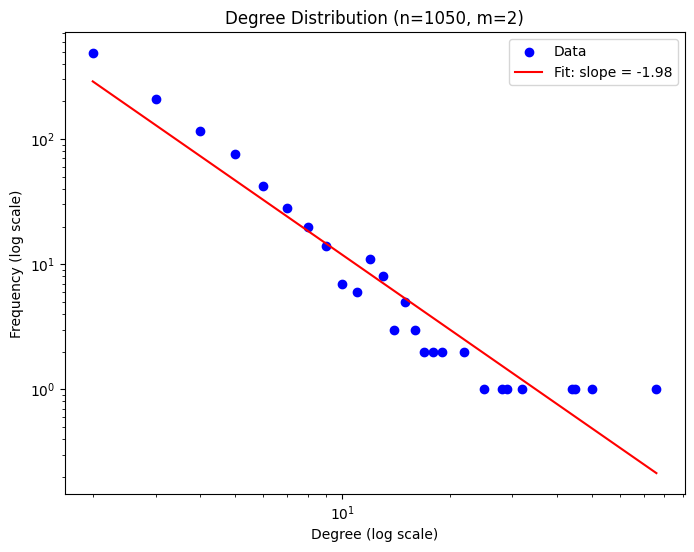

Degree Distribution (n=1050, m=2)
Estimated slope: -1.9813105080623148


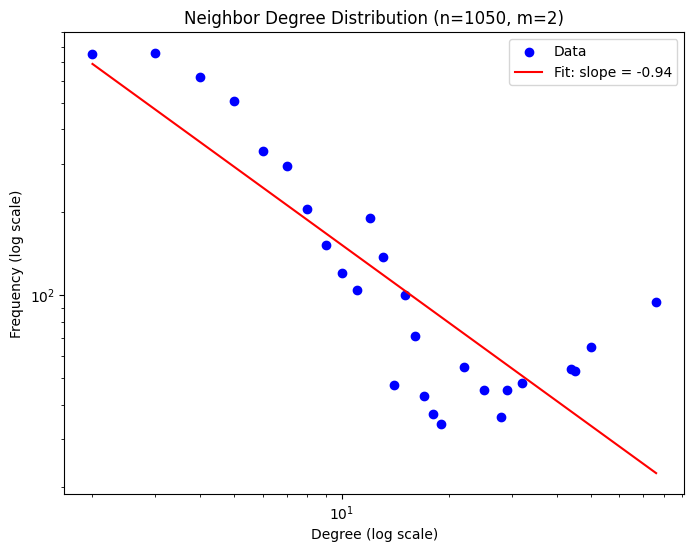

Neighbor Degree Distribution (n=1050, m=2)
Estimated slope: -0.9411956205983457


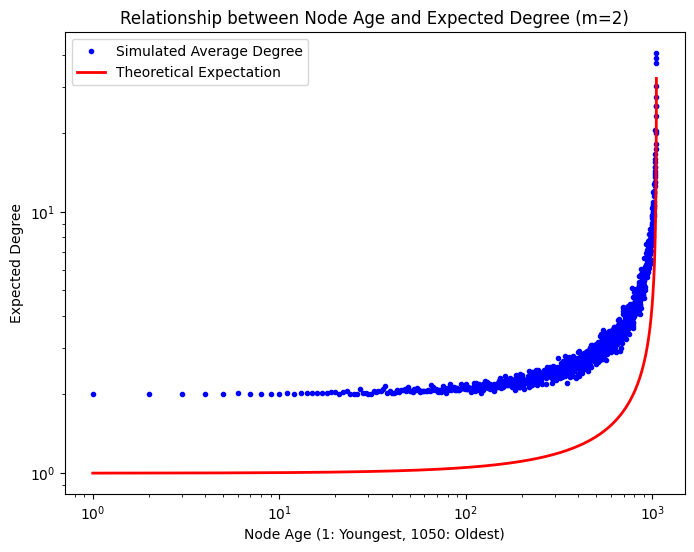


############################
m = 6
Generating network with n = 1050 (small network)
Is the network connected? True
Small network (n=1050): Modularity = 0.2492, Assortativity = -0.0409
Large network (n=10500): Modularity = 0.2467, Assortativity = -0.0016


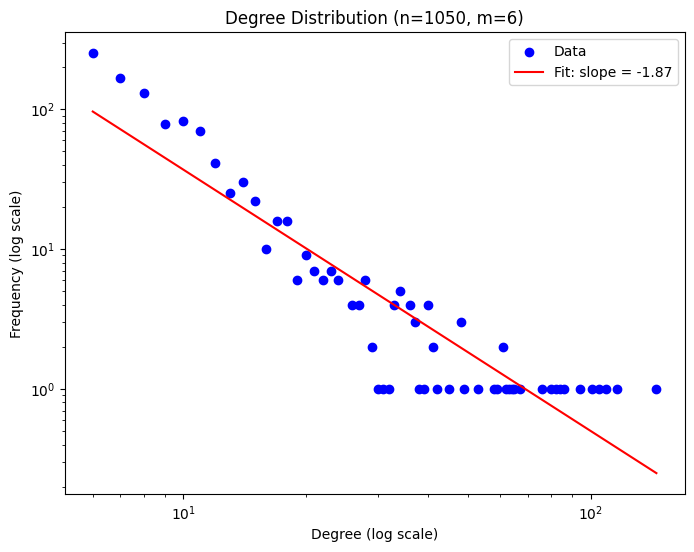

Degree Distribution (n=1050, m=6)
Estimated slope: -1.8694833884456488


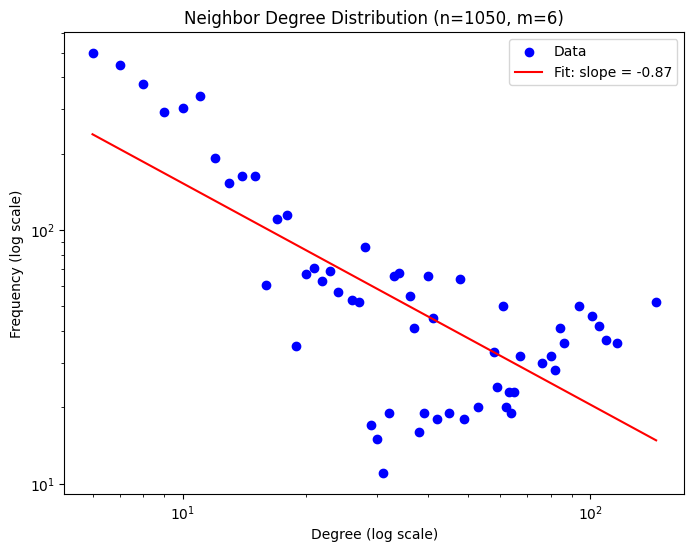

Neighbor Degree Distribution (n=1050, m=6)
Estimated slope: -0.8728454448064873


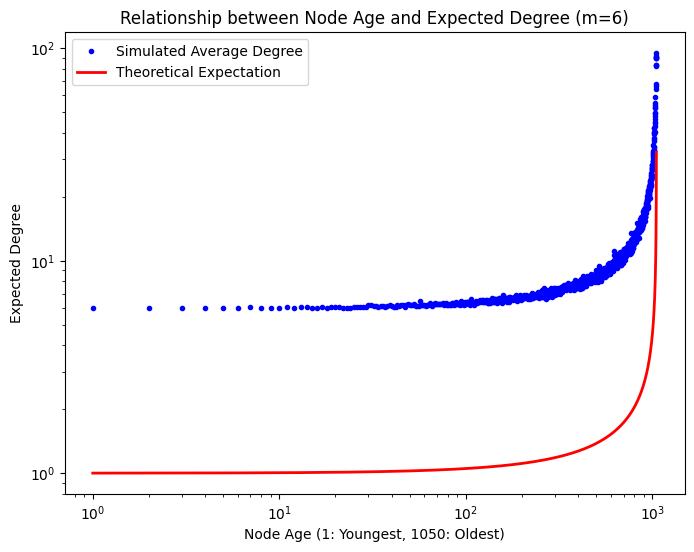


Summary of results for different m values:

m = 1:
  Small network (n=1050): Modularity = 0.9303, Assortativity = -0.0765
  Large network (n=10500): Modularity = 0.9789, Assortativity = -0.0511
  Degree distribution slope: -2.11
  Neighbor degree distribution slope: -1.02

m = 2:
  Small network (n=1050): Modularity = 0.5133, Assortativity = -0.0631
  Large network (n=10500): Modularity = 0.5314, Assortativity = -0.0144
  Degree distribution slope: -1.98
  Neighbor degree distribution slope: -0.94

m = 6:
  Small network (n=1050): Modularity = 0.2492, Assortativity = -0.0409
  Large network (n=10500): Modularity = 0.2467, Assortativity = -0.0016
  Degree distribution slope: -1.87
  Neighbor degree distribution slope: -0.87


In [ ]:
# 1.2(g)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# 定义一个函数生成 BA 网络
def generate_BA_network(n, m):
    return ig.Graph.Barabasi(n=n, m=m, directed=False)

# 定义函数：计算 BA 网络的社区结构 modularity 和 degree assortativity
def compute_modularity_assortativity(g):
    dendrogram = g.community_fastgreedy()
    communities = dendrogram.as_clustering()
    mod = communities.modularity
    assort = g.assortativity_degree(directed=False)
    return mod, assort

# 定义函数：在 log-log 坐标下绘制度分布，并用线性回归估计斜率
def plot_degree_distribution_loglog(g, title=""):
    degrees = np.array(g.degree())
    k_vals, counts = np.unique(degrees, return_counts=True)
    log_k = np.log10(k_vals)
    log_counts = np.log10(counts)
    slope, intercept = np.polyfit(log_k, log_counts, 1)

    plt.figure(figsize=(8,6))
    plt.scatter(k_vals, counts, color='blue', label="Data")
    fitted_counts = 10**intercept * k_vals**(slope)
    plt.plot(k_vals, fitted_counts, color='red', label=f"Fit: slope = {slope:.2f}")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.title(title)
    plt.legend()
    plt.show()

    print(title)
    print("Estimated slope:", slope)
    return slope

# 定义函数：随机采样邻居节点的度数，绘制其 log-log 度分布并估计斜率
def plot_neighbor_degree_distribution(g, sample_size=5000, title=""):
    neighbor_degrees = []
    n = g.vcount()
    for _ in range(sample_size):
        # 随机选择一个节点 i
        i = np.random.randint(0, n)
        neighbors = g.neighbors(i)
        if len(neighbors) == 0:
            continue
        # 随机选择一个邻居 j
        j = np.random.choice(neighbors)
        neighbor_degrees.append(g.degree(j))
    neighbor_degrees = np.array(neighbor_degrees)

    k_vals, counts = np.unique(neighbor_degrees, return_counts=True)
    log_k = np.log10(k_vals)
    log_counts = np.log10(counts)
    slope, intercept = np.polyfit(log_k, log_counts, 1)

    plt.figure(figsize=(8,6))
    plt.scatter(k_vals, counts, color='blue', label="Data")
    fitted_counts = 10**intercept * k_vals**(slope)
    plt.plot(k_vals, fitted_counts, color='red', label=f"Fit: slope = {slope:.2f}")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.title(title)
    plt.legend()
    plt.show()

    print(title)
    print("Estimated slope:", slope)
    return slope

# 定义函数：估计每个节点（按添加顺序）的平均度数，并绘制“节点年龄 vs. 期望度数”图
def plot_expected_degree_vs_age(n, m, num_simulations=50):
    degree_sum = np.zeros(n)
    for sim in range(num_simulations):
        g = ig.Graph.Barabasi(n=n, m=m, directed=False)
        degrees = np.array(g.degree())
        degree_sum += degrees
    avg_degrees = degree_sum / num_simulations

    # 原始节点顺序 i=1 表示最老的节点，i=n 表示最新的节点
    i_vals = np.arange(1, n+1)
    # 定义节点年龄：令 age = n - i + 1，使得 age=1 为最年轻，age=n 为最老
    age_vals = n - i_vals + 1
    # 理论上，对于 BA 模型（m=1）的预期：k(i) ≈ sqrt(n/i)
    # 转换为 age：i = n - age + 1  => theoretical k(age) = sqrt(n/(n - age + 1))
    theoretical_degrees = np.sqrt(n / (n - age_vals + 1))

    # 按年龄从小到大排序（最年轻到最老）
    sorted_indices = np.argsort(age_vals)
    sorted_age = age_vals[sorted_indices]
    sorted_avg_degrees = avg_degrees[sorted_indices]
    sorted_theoretical = theoretical_degrees[sorted_indices]

    plt.figure(figsize=(8,6))
    plt.plot(sorted_age, sorted_avg_degrees, 'bo', markersize=3, label="Simulated Average Degree")
    plt.plot(sorted_age, sorted_theoretical, 'r-', linewidth=2, label="Theoretical Expectation")
    plt.xlabel("Node Age (1: Youngest, {}: Oldest)".format(n))
    plt.ylabel("Expected Degree")
    plt.title(f"Relationship between Node Age and Expected Degree (m={m})")
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

# -------------------------------
# 主程序：对 m=1,2,6 进行重复
m_values = [1, 2, 6]
n_small = 1050    # 小规模网络
n_large = 10500   # 大规模网络（用于社区指标对比）

results = {}  # 保存各 m 值下的指标

for m_val in m_values:
    print("\n############################")
    print(f"m = {m_val}")
    print(f"Generating network with n = {n_small} (small network)")

    # 生成小规模网络
    g_small = generate_BA_network(n_small, m_val)
    # 检查连通性（BA 模型通常都是连通的）
    print("Is the network connected?", g_small.is_connected())

    # 计算社区指标：modularity 和 assortativity
    mod_small, assort_small = compute_modularity_assortativity(g_small)
    print(f"Small network (n=1050): Modularity = {mod_small:.4f}, Assortativity = {assort_small:.4f}")

    # 生成大规模网络，用于对比社区指标
    g_large = generate_BA_network(n_large, m_val)
    mod_large, assort_large = compute_modularity_assortativity(g_large)
    print(f"Large network (n=10500): Modularity = {mod_large:.4f}, Assortativity = {assort_large:.4f}")

    # 绘制度分布（log-log）并估计斜率
    slope_deg = plot_degree_distribution_loglog(g_small, title=f"Degree Distribution (n=1050, m={m_val})")

    # 绘制随机采样邻居度分布（log-log）并估计斜率
    slope_neighbor = plot_neighbor_degree_distribution(g_small, sample_size=5000,
                                                         title=f"Neighbor Degree Distribution (n=1050, m={m_val})")

    # 绘制节点年龄与期望度数的关系图
    plot_expected_degree_vs_age(n_small, m_val, num_simulations=50)

    # 保存当前 m 值下的结果
    results[m_val] = {
        "modularity_small": mod_small,
        "assortativity_small": assort_small,
        "modularity_large": mod_large,
        "assortativity_large": assort_large,
        "slope_degree": slope_deg,
        "slope_neighbor": slope_neighbor
    }

# 输出不同 m 值下的比较结果
print("\nSummary of results for different m values:")
for m_val in m_values:
    print(f"\nm = {m_val}:")
    print(f"  Small network (n=1050): Modularity = {results[m_val]['modularity_small']:.4f}, Assortativity = {results[m_val]['assortativity_small']:.4f}")
    print(f"  Large network (n=10500): Modularity = {results[m_val]['modularity_large']:.4f}, Assortativity = {results[m_val]['assortativity_large']:.4f}")
    print(f"  Degree distribution slope: {results[m_val]['slope_degree']:.2f}")
    print(f"  Neighbor degree distribution slope: {results[m_val]['slope_neighbor']:.2f}")


PA network generated with n=1050, m=1.
Degree sequence extracted from network.
New network generated via stub-matching procedure.
PA network modularity: 0.9306620949999133
Stub-matching network modularity: 0.9343457521394474


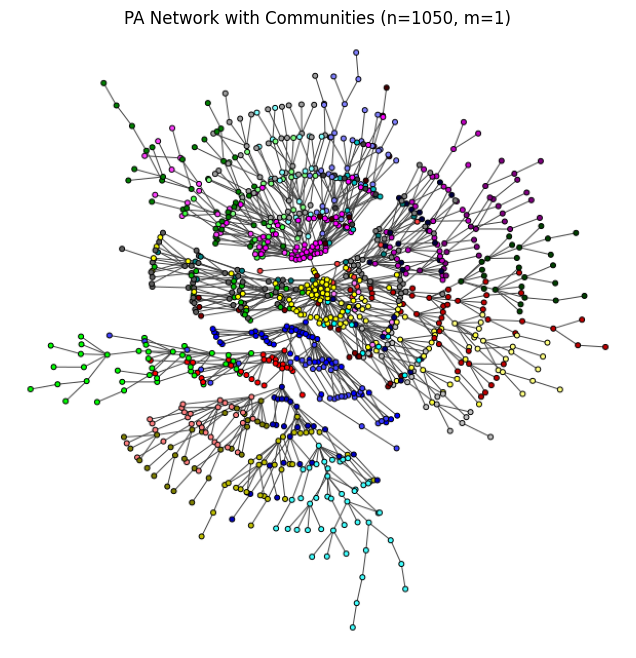

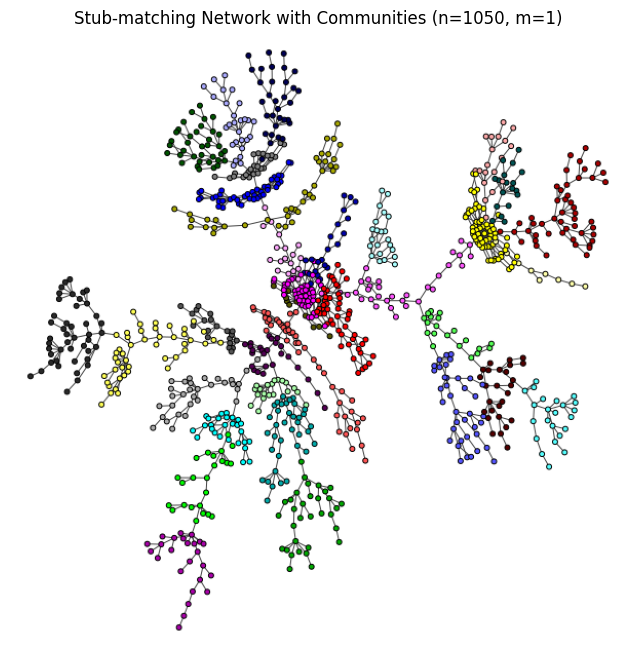


Summary of community detection:
PA network modularity: 0.9306620949999133
Stub-matching network modularity: 0.9343457521394474


In [ ]:
# 1.2(h)
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Generate network (n = 1050, m = 1)
n = 1050
m = 1
g_ba = ig.Graph.Barabasi(n=n, m=m, directed=False)
print("PA network generated with n=1050, m=1.")

# -------------------------------
# Step 2: Extract degree sequence and generate new network via stub-matching
degree_seq = g_ba.degree()
print("Degree sequence extracted from network.")

# 使用 Viger-Latapy 算法通过 stub-matching 生成具有相同度序列的随机网络
g_stub = ig.Graph.Degree_Sequence(degree_seq, method="vl")
print("New network generated via stub-matching procedure.")

# -------------------------------
# Step 3: Community detection
def detect_communities(g):
    """
    对图 g 使用 fastgreedy 进行社区检测，
    如果出现异常则使用 walktrap 方法。
    """
    try:
        dendro = g.community_fastgreedy()
        comm = dendro.as_clustering()
    except Exception as e:
        print("Fast greedy failed, using walktrap:", e)
        comm = g.community_walktrap().as_clustering()
    return comm

communities_ba = detect_communities(g_ba)
communities_stub = detect_communities(g_stub)

# 计算 modularity
mod_ba = communities_ba.modularity
mod_stub = communities_stub.modularity

print("PA network modularity:", mod_ba)
print("Stub-matching network modularity:", mod_stub)

# -------------------------------
# Step 4: Assign colors to communities for plotting
def assign_community_colors(g, communities):
    # 使用内置调色板分配颜色，每个社区分配一个颜色
    palette = ig.drawing.colors.ClusterColoringPalette(len(communities))
    colors = [palette[m] for m in communities.membership]
    g.vs["color"] = colors

assign_community_colors(g_ba, communities_ba)
assign_community_colors(g_stub, communities_stub)

# -------------------------------
# Step 5: Plot both networks with community coloring
# 使用 Kamada-Kawai 布局获得较好视觉效果
layout_ba = g_ba.layout("kk")
layout_stub = g_stub.layout("kk")

# 绘制 BA 网络图并保存到文件
ba_plot_file = "PA_network.png"
ig.plot(g_ba, ba_plot_file, layout=layout_ba, vertex_size=5, vertex_label=None, margin=20)
# 读取并显示 BA 网络图
plt.figure(figsize=(8,8))
img_ba = plt.imread(ba_plot_file)
plt.imshow(img_ba)
plt.title("PA Network with Communities (n=1050, m=1)")
plt.axis("off")
plt.show()

# 绘制 Stub-matching 网络图并保存到文件
stub_plot_file = "Stub_network.png"
ig.plot(g_stub, stub_plot_file, layout=layout_stub, vertex_size=5, vertex_label=None, margin=20)
# 读取并显示 Stub-matching 网络图
plt.figure(figsize=(8,8))
img_stub = plt.imread(stub_plot_file)
plt.imshow(img_stub)
plt.title("Stub-matching Network with Communities (n=1050, m=1)")
plt.axis("off")
plt.show()

# -------------------------------
# Summary: 输出两个网络的 modularity 进行比较
print("\nSummary of community detection:")
print("PA network modularity:", mod_ba)
print("Stub-matching network modularity:", mod_stub)


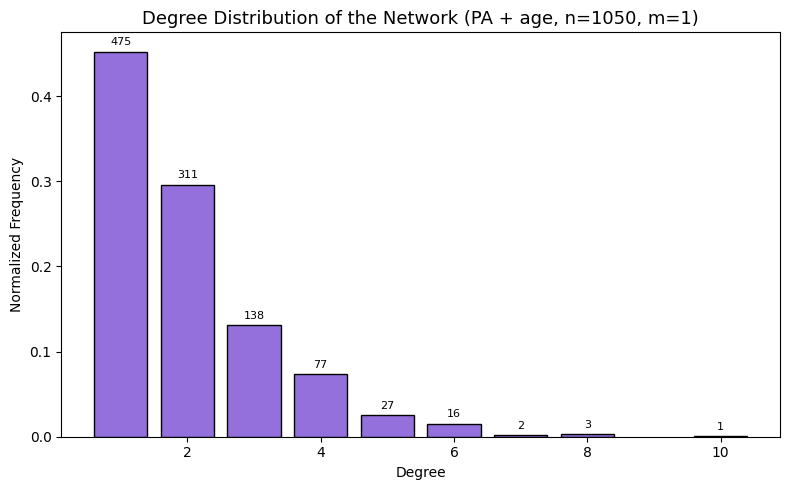

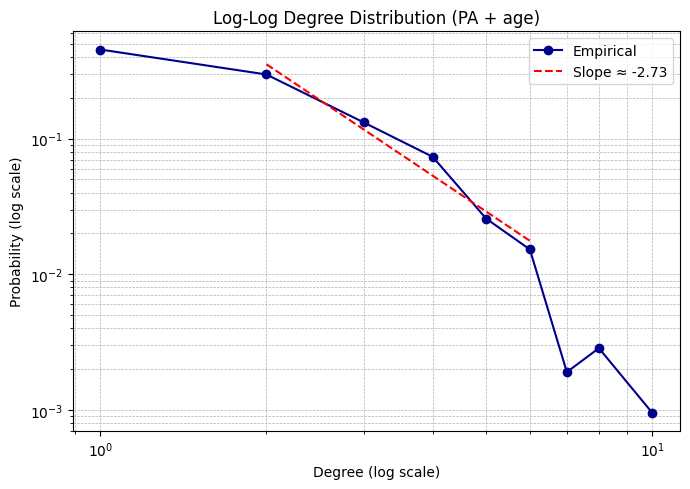

Estimated power-law exponent γ ≈ 2.73


In [ ]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ---------------------------
# Step 1: Generate network with age penalty
# ---------------------------

n = 1050                  # number of nodes
m = 1                    # edges per new node
alpha = 1                # degree exponent
beta = -1                # age penalty exponent
a = c = d = 1            # constants in the formula
b = 0

g = ig.Graph()
g.add_vertices(1)        # start with 1 node

for new_node in range(1, n):
    g.add_vertices(1)

    degrees = np.array(g.degree(range(new_node)), dtype=float)
    ages = np.array([new_node - i for i in range(new_node)], dtype=float)

    # Compute attractiveness scores
    scores = (c * degrees**alpha + a) * (d * ages**beta + b + 1e-8)
    prob = scores / np.sum(scores)

    # Connect to m old nodes based on probability
    targets = np.random.choice(range(new_node), size=m, replace=False, p=prob)
    g.add_edges([(new_node, int(t)) for t in targets])

# ---------------------------
# Step 2: Degree distribution (bar chart)
# ---------------------------

degrees = g.degree()
degree_counts = np.bincount(degrees)
nonzero_degrees = np.nonzero(degree_counts)[0]
frequencies = degree_counts[nonzero_degrees]
normalized_freq = frequencies / sum(frequencies)

plt.figure(figsize=(8, 5))
bars = plt.bar(nonzero_degrees, normalized_freq, color='mediumpurple', edgecolor='black')
plt.title("Degree Distribution of the Network (PA + age, n=1050, m=1)", fontsize=13)
plt.xlabel("Degree")
plt.ylabel("Normalized Frequency")

# Label each bar with frequency count
for rect, count in zip(bars, frequencies):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.005, f"{count}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# ---------------------------
# Step 3: Log-log plot + power-law slope estimation (adjusted)
# ---------------------------

plt.figure(figsize=(7, 5))
plt.loglog(nonzero_degrees, normalized_freq, 'o-', color='darkblue', label='Empirical')


fit_mask = (nonzero_degrees >= 2) & (nonzero_degrees <= 6)
x_fit = nonzero_degrees[fit_mask]
y_fit = normalized_freq[fit_mask]

log_x = np.log10(x_fit)
log_y = np.log10(y_fit)


slope, intercept, *_ = linregress(log_x, log_y)
gamma = -slope


plt.plot(x_fit, 10**(intercept + slope * log_x), 'r--', label=f"Slope ≈ {slope:.2f}")
plt.xlabel("Degree (log scale)")
plt.ylabel("Probability (log scale)")
plt.title("Log-Log Degree Distribution (PA + age)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


print(f"Estimated power-law exponent γ ≈ {gamma:.2f}")


In [ ]:
community = g.community_fastgreedy().as_clustering()

modularity = community.modularity
num_communities = len(community)

print(f"Number of communities: {num_communities}")
print(f"Modularity: {modularity:.4f}")

Number of communities: 34
Modularity: 0.9364
